<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Multiple_Regularize_LR_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>

#Multivariate and Regularized Linear Regression Implementation


Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made  free for educational purposes. Nonetheless, the notebooks of this class should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  


###**Instructions:**
- You will be using Python.

- Only modify the code that is within the comments:

`### START CODE HERE ###`

`### END CODE HERE ###`

- You need to run all the code cells on the notebok sequentially
- If you are asked to change/update a cell, change/update and run it to check if your result is correct.

# Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


from sklearn.utils import resample

# Common imports
import numpy as np
import pandas as pd

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))


!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_MRLR/House_data_multiv.txt
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_MRLR/FremontBridge.csv
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_MRLR/BicycleWeatherdata.csv


--2025-02-24 20:16:48--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_MRLR/House_data_multiv.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘House_data_multiv.txt’

House_data_multiv.t 100%[===================>]     657  --.-KB/s    in 0s      

2025-02-24 20:16:49 (29.8 MB/s) - ‘House_data_multiv.txt’ saved [657/657]

--2025-02-24 20:16:49--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/Data_MRLR/FremontBridge.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respon

# 1- Linear regression with multiple variables




In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `House_data_multiv.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

<a id="section4"></a>


### 1.2- Feature Normalization



We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [ ]:
# Load data
data = np.loadtxt( 'House_data_multiv.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
y=y[:,np.newaxis]

m = y.size
# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i,0]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


Your task here is to complete the code in `feature_Normalize_implementation` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation.

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `feature_Normalize_implementation` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$.

You will do this for all the features and your code should work with datasets of any sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.


#### 1.2  Excersice

In [ ]:
def  feature_Normalize_implementation(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).

    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    ### START CODE HERE ### (≈ 3 lines of code)



    ### END CODE HERE ###

    return X_norm, mu, sigma

Lets check your code

In [ ]:
X_norm, mu, sigma= feature_Normalize_implementation(X)

print('{:>8s}{:>15s}'.format('X_norm[:,0]', 'X_norm[:, 1]'))
print('-'*26)
for i in range(5):
    print('{:>8.3f}{:>15.3f}'.format(X_norm[i, 0], X_norm[i, 1]))

print("Features means:{:>9.3f}{:>14.3f}".format(mu[0], mu[1]))
print("Features Std:{:>10.3f}{:>15.3f}".format(sigma[0], sigma[1]))


X_norm[:,0]   X_norm[:, 1]
--------------------------
   0.131         -0.226
  -0.510         -0.226
   0.508         -0.226
  -0.744         -1.554
   1.271          1.102
Features means: 2000.681         3.170
Features Std:   786.203          0.753


**Expected output:**


```
X_norm[:,0]   X_norm[:, 1]
--------------------------
   0.131         -0.226
  -0.510         -0.226
   0.508         -0.226
  -0.744         -1.554
   1.271          1.102
Features means: 2000.681        3.170
Features Std:   786.203         0.753
```



We can alos normalized our data using the `StandardScaler()` from  [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [ ]:
#Get the Mean and SD used to normalize the data, so we can apply it to our testing
std_scaler = StandardScaler()
X_norm_sklearn=std_scaler.fit_transform(X)
mu_sklearn=std_scaler.fit(X).mean_
sigma_sklearn=np.sqrt(std_scaler.fit(X).var_)

print('{:>8s}{:>15s}'.format('X_norm_sklearn[:,0]', 'X_norm_sklearn[:, 1]'))
print('-'*26)
for i in range(5):
    print('{:>8.3f}{:>15.3f}'.format(X_norm_sklearn[i, 0], X_norm_sklearn[i, 1]))

print("Features means:{:>9.3f}{:>13.3f}".format(mu_sklearn[0],mu_sklearn[1]))
print("Features Std:{:>10.3f}{:>14.3f}".format(sigma_sklearn[0], sigma_sklearn[1]))


X_norm_sklearn[:,0]X_norm_sklearn[:, 1]
--------------------------
   0.131         -0.226
  -0.510         -0.226
   0.508         -0.226
  -0.744         -1.554
   1.271          1.102
Features means: 2000.681        3.170
Features Std:   786.203         0.753


**Sanity check:**

If we get the mean and std of the normalized features we should have means approx. 1, stds approx. 0. If you look at the actual values without the rounding (i.e., change the `3` for `24` on the code `{:>12.3f}`) you will see it is not exactly 1 nor 0 due to computational error)



In [ ]:
X_norm2, mu2, sigma2= feature_Normalize_implementation(X_norm)
print("Normalized features means:{:>8.3f}{:>12.3f}".format(mu2[0], mu2[1]))
print("Normalized features Std:{:>9.3f}{:>13.3f}".format(sigma2[0], sigma2[1]))

Normalized features means:  -0.000       0.000
Normalized features Std:    1.000        1.000


**Expected output:**

```
Normalized features means:  -0.000       0.000
Normalized features Std:    1.000        1.000
```



### 1.3 - Ridge Regression with the Normal Equation





Thr closed-form solution to Ridge Linear Regression is:

$$ \theta = \left( X^T X + \lambda A\right)^{-1} X^T{y}$$

Where $A$ is the $(n +1)\times(n+1)$ identity matrix, except with a 0 in the top-left cell, corresponting tot he bias/intercept term.



#### 1.3 **Excersice**

Now you need to complete the `normalEqn_Reg` function to performe the closed-form solution to Ridge Linear Regression for any matrix $X$ and regularization term $\lambda$

Hints: Look at `np.identity` & `np.linalg.inv`

In [ ]:
def normalEqn_Reg(X, y,lambda_term):
    """
    Computes the closed-form solution to linear regression using the normal equations.

    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).

    y : array_like
        The value at each data point. A vector of shape (m x 1).

    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1 x 1).

    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.

    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])

    ### START CODE HERE ### (≈ 3 lines of code)




    ### END CODE HERE ###
    return theta.reshape(X.shape[1],1)


Lets test your solution. To implement Ridge Linear Regression is key to Normalized the data.

In [ ]:
#Let use the same data as for our "Day9_Regularized_Linear_Regression.ipynb" notebook
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [ ]:
#Create polynomial features
Degree_of_the_Polynomial_Model=5

#"include_bias=False" since we dont want to normalized the intercep/bias term
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_poly = poly_features.fit_transform(X)

#Get the Mean and SD used to normalize the data, so we can apply it to our testing
std_scaler = StandardScaler()
X_scale=std_scaler.fit(X_poly)

#Scaling our data is key for Regularized LR to work
X_poly=std_scaler.fit_transform(X_poly)

#If you comment the line above you will see gradient descent will not work well (or at all)
X_poly = np.hstack([np.ones(shape=(y.size,1)), X_poly])

# initialize fitting parameters (n+1)
theta= np.zeros(Degree_of_the_Polynomial_Model+1).reshape(Degree_of_the_Polynomial_Model+1,1)


alpha = 0.1       #0.3
lambda_term=0.02


theta_best= normalEqn_Reg(X_poly,y,lambda_term)
print(theta_best)
theta_cost=computeCost(X_poly, y, theta_best)
print("Cost value= {}".format(round(theta_cost,4)))

[[ 1.50467735]
 [ 1.02273468]
 [-1.59103516]
 [-0.06054524]
 [ 0.47300252]
 [ 0.60908347]]
Cost value= 0.1431


**Expected output:**

For Degrees=5, lambda_term=0.02
```
[[ 1.50467735]
 [ 1.02273468]
 [-1.59103516]
 [-0.06054524]
 [ 0.47300252]
 [ 0.60908347]]
Cost value= 0.1431
```



#### 1.3.1 - Ridge Regression with scikit-learn

Here is the code on how to run the same Ridge Linear Regression using scikit-learn

In [ ]:
#Import Ridge Linear Regression
from sklearn.linear_model import Ridge

#Set the hyperparameter
ridge_reg = Ridge(alpha=lambda_term)

#Lets pass out X matrix with the polynomial terms
ridge_reg.fit(X_poly, y)

#Lets get the thetas
coe=ridge_reg.coef_
interc=ridge_reg.intercept_
coe=coe.reshape(coe.size,1)
interc=interc.reshape(interc.size,1)
theta_sklearn=np.vstack([interc,coe[1:, :]])
print(theta_sklearn)
theta_sklearn_cost=computeCost(X_poly, y, theta_sklearn)
print("Cost value= {}".format(round(theta_sklearn_cost,4)))

[[ 1.50467735]
 [ 1.02273468]
 [-1.59103516]
 [-0.06054524]
 [ 0.47300252]
 [ 0.60908347]]
Cost value= 0.1431


### 1.4. Let’s plot our Regularized Linear Regression model.

Pay attention on how we need to use the original mean and std used to transform the training set, to now transform our inputs for our predictions (the x to create our line)

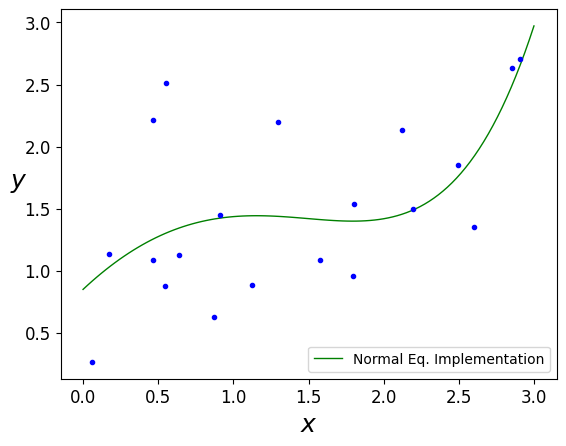

In [ ]:
#Lets create some new data to create a line
X_new = np.linspace(0, 3, 100).reshape(100, 1)
#Add some polynomial term to this data
poly_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
X_new_poly = poly_features.fit_transform(X_new)

#WE NEED TO SCALE OUR DATA BASED ON THE SCALE WE USE FOR TRAINING!!!!
X_new_poly_sclae=X_scale.transform(X_new_poly)

#Add Theta_0
X_new_poly_sclae_0 = np.hstack([np.ones(shape=(X_new.size,1)), X_new_poly_sclae])

#Lets cacuate our model (h, y_hat)
y_newbig_theta_best= X_new_poly_sclae_0.dot(theta_best)

#Plot models
plt.plot(X_new, y_newbig_theta_best, "g", linewidth=1,  label='Normal Eq. Implementation')

plt.plot(X, y, "b.", linewidth=3)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc=4);


### 1.5. MAE, MSE, RMSE, $R^2$, and adjusted $R^2$

It is quite common for the cost function used during training to be
different from the performance measure used for testing (we will talk even more about this later). Apart from regularization, another reason they might be different is that a
good training cost function should have optimization-friendly
derivatives, while the performance measure used for testing should
be as close as possible to the final objective we want to achive.

For example, regression model are often trained using a cost function MSE but evaluated using RMSE or $R^2$. Similarly, classifiers are often trained using a cost function such as the log loss but evaluated using precision/recall or accuracy.

So what are the different metric to evaluate a regression model?

The MAE, MSE, RMSE, and $R^2$ metrics are mainly used to evaluate the prediction error rates and model performance of regression models.
<br></br>

#### 1.5.1- **MAE** (Mean absolute error)

Represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.


$$ MAE = \frac{1}{m}\sum_{i=1}^m |\ h_{\theta}(x^{i})- y^{i}|$$


##### **Excersice MAE**

Now you need to complete the `MAE` function to calculate the Mean absolute error. You need to complete the docstring information missing.


In [ ]:
def MAE(y_true,y_pred):
    """
    NEED TO COMPLETE

    Parameters
    ----------
    y_true : array_like
        The value at each data point. A vector of shape (m x 1).

    y_pred : array_like
        The predicted data values. A vector of shape (m x 1).

    Returns
    -------
      NEED TO COMPLETE

    """
    ### START CODE HERE ### (≈ 1 lines of code)


    ### END CODE HERE ###
    return MAE_val


Lets test you code

In [ ]:
y_pre=ridge_reg.predict(X_poly).reshape(-1, 1)
MAE_val=MAE(y,y_pre)
print("MAE=", round(MAE_val,4))

MAE= 0.4155


We can also use the sklearn metric to calculate the MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE_skl=mean_absolute_error(y, y_pre)
print("sklearn MAE =", round(MAE_skl,4))

sklearn MAE = 0.4155


#### 1.5.2- **MSE** (Mean Squared Error)

Represents the difference between the original and predicted values extracted by squared the average difference over the data set.

$$ MSE = \frac{1}{m}\sum_{i=1}^m\left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$


##### **Excersice MSE**

Now you need to complete the `MSE`function to calculate the Mean Squared Error. You also need to complete the docstring information missing.


In [ ]:
def MSE(y_true,y_pred):
    """
    NEED TO COMPLETE

    Parameters
    ----------
    y_true : array_like
        The value at each data point. A vector of shape (m x 1).

    y_pred : array_like
        The predicted data values. A vector of shape (m x 1).

    Returns
    -------
      NEED TO COMPLETE

    """
    ### START CODE HERE ### (≈ 1 lines of code)


    ### END CODE HERE ###
    return MSE_val


Lets test you code

In [ ]:
MSE_val=MSE(y,y_pre)
print("MSE=", round(MSE_val,4))

MSE= 0.2862


We can also use the sklearn metric to calculate the MSE

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_skl=mean_squared_error(y, y_pre)
print("sklearn MSE =", round(MSE_skl,4))

sklearn MSE = 0.2862


#### 1.5.3- **RMSE**(Root Mean Squared Error)


Is the error rate by the square root of MSE.

$$ RMSE = \sqrt{MSE}= \sqrt{ \frac{1}{m}\sum_{i=1}^m\left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2}$$

##### **Excersice RMSE**

Now you need to complete the `RMSE`function to calculate the Root Mean Squared Error. You also need to complete the docstring information missing and cannot call the MSE function within the RMSE function.


In [ ]:
def RMSE(y_true,y_pred):
    """
    NEED TO COMPLETE

    Parameters
    ----------
    y_true : array_like
        The value at each data point. A vector of shape (m x 1).

    y_pred : array_like
        The predicted data values. A vector of shape (m x 1).

    Returns
    -------
      NEED TO COMPLETE

    """
    ### START CODE HERE ### (≈ 1 lines of code)


    ### END CODE HERE ###
    return RMSE_val


Lets test you code

In [ ]:
RMSE_val=RMSE(y,y_pre)
print("RMSE=", round(RMSE_val,4))

RMSE= 0.535


We can also use the sklearn metric to calculate the RMSE


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE_skl=sqrt(mean_squared_error(y,y_pre))
print("sklearn RMSE =", round(RMSE_skl,4))

sklearn RMSE = 0.535


#### 1.5.4- **$R^2$** (Coefficient of determination)



Represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages (i.e., percentage of the data variability explained by the model). The higher the value is, the better the model is.

$$ R^2 = 1- \frac{\sum_{i=1}^m\left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2}{\sum_{i=1}^m\left( \bar{y} - y^{(i)}\right)^2}$$

Where $\bar{y}$ is the mean value of $y$
<br></br>

**$R^2$-adjusted** is a modified version of $R^2$ that has been adjusted for the number of predictors in the model. The adjusted $R^2$  increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted$R^2$  can be negative, but it’s usually not.  It is always lower than the $R^2$

$$ R^2-adj= 1-(1-R^2)\left[\frac{m-1}{m-(n+1)}\right]$$

##### **Excersice $R^2$**

Now you need to complete the `R_square`function to calculate the Coefficient of determination. You also need to complete the docstring information missing.

In [ ]:
def R_square(y_true,y_pred):
    """
    NEED TO COMPLETE

    Parameters
    ----------
    y_true : array_like
        The value at each data point. A vector of shape (m x 1).

    y_pred : array_like
        The predicted data values. A vector of shape (m x 1).

    Returns
    -------
      NEED TO COMPLETE

    """
    ### START CODE HERE ### (≈ 1 lines of code)


    ### END CODE HERE ###
    return R_square_val

Lets test you code

In [ ]:
R_square_val=R_square(y,y_pre)
print("R_square=", round(R_square_val,4))

R_square= 0.3841


We can also use the sklearn metric to calculate the $R^2$

In [ ]:
from sklearn.metrics import r2_score
R_square_skl=r2_score(y, y_pre)
print("sklearn R_square =", round(R_square_skl,4))

sklearn R_square = 0.3841


# 2- Using Linear Regression for Predicting Bicycle Traffic

As an practical example, we will look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.


We will perform some basic feature engineering, and will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors (e.g., temperature, precipitation, and daylight hours) affect the volume of bicycle traffic.

Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (We will used station ID [USW00024233](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail)) and we can easily use the [Pandas library](https://pandas.pydata.org/) to join the two data sources.

We will perform a multivariate linear regression and a Ridge Linear Regression  to map features (i.e., weather and other information) to bicycle counts. We wil also look at the model's parameter to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the two datasets, indexing by date:

In [ ]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [ ]:
#Data is already on your data folder
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeatherdata.csv', index_col='DATE', parse_dates=True)

Next we will compute the total daily bicycle traffic, and put this in its own dataframe:

In [ ]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

Bicycle use could vary from day to day; so let's account for this in our data by adding binary columns that indicate the day of the week. While the feature of "day of the week" is a categorical varaible, we can create a sereis of binary "dummy" variables.

In [ ]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

(8.0, 17.0)

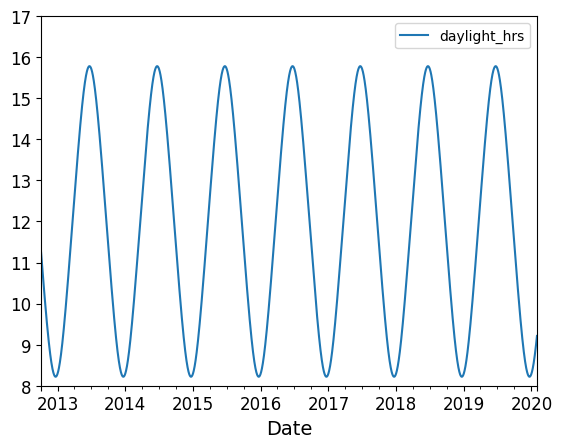

In [ ]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.Timestamp(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)


We can also add the average temperature and total precipitation to the data.
In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [ ]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

Now our data is in order, and we can take a look at it:

In [ ]:
print("Dataset shape:", daily.shape)
daily.head()

Dataset shape: (2677, 14)


,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


Since we would like to test how well our predictive model would perform in new data, we need to test it performance with data that it has not seen before. To achieve this, we will first partition our dataset in a training and a test set. We will do an 70/30 partition using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn.model_selection`

In [ ]:
from sklearn.model_selection import train_test_split
daily, test = train_test_split(daily, test_size=0.3, random_state=43)

**Let's do some EDA.**

You should never look at the values of your test set to avoid any bias.

In [ ]:
daily.describe(include='all')


,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
count,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,746.000000,746.000000,746.000000,1873.000000
mean,5510.469834,0.148959,0.145755,0.148425,0.147891,0.144154,0.130806,0.134010,0.013881,11.826308,0.114865,12.499196,0.583110,3.641833
std,2736.750680,0.356143,0.352955,0.355616,0.355087,0.351339,0.337278,0.340754,0.117030,2.619684,0.256962,6.225003,0.493375,2.127302
min,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.218894,0.000000,-3.550000,0.000000,0.000000
25%,3546.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.246009,0.000000,7.750000,0.000000,1.775342
50%,5200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.672607,0.000000,11.650000,1.000000,3.652055
75%,7712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.404854,0.107283,17.800000,1.000000,5.468493
max,12856.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.781095,2.200787,26.100000,1.000000,7.331507


In [ ]:
daily.describe

<bound method NDFrame.describe of               Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                            
2019-03-20   9662.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.834377   
2016-09-17   1842.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     12.217122   
2014-08-22   7670.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     13.737859   
2014-08-28   8818.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     13.404518   
2013-02-22   2720.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     10.365253   
...             ...  ...  ...  ...  ...  ...  ...  ...      ...           ...   
2018-05-29   8896.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0     15.406955   
2018-07-10  10204.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0      0.0     15.561776   
2019-02-14   1762.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0      9.907206   
2019-01-23   5562.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0      8.889972   
2017-11-06   6444.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0      9.443252   

                PRCP  Temp (C)  dry day    annual  
Date                                               
2019-03-20       NaN       NaN      NaN  6.463014  
2016-09-17       NaN       NaN      NaN  3.958904  
2014-08-22  0.000000     18.60      1.0  1.884932  
2014-08-28  0.000000     18.85      1.0  1.901370  
2013-02-22  0.370079      5.85      0.0  0.389041  
...              ...       ...      ...       ...  
2018-05-29       NaN       NaN      NaN  5.654795  
2018-07-10       NaN       NaN      NaN  5.769863  
2019-02-14       NaN       NaN      NaN  6.369863  
2019-01-23       NaN       NaN      NaN  6.309589  
2017-11-06       NaN       NaN      NaN  5.095890  

[1873 rows x 14 columns]>

As you can see from the EDA, we should probably perform feature normalization, as well as to deal with the NA's value. There are [multiple techniques to deal with NA's](https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca), but for now we can just remove any row that has an NA value. We should also do the same for our test set.

In [ ]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

X_test = test[column_names]
y_test = test['Total']

Now can perform some Linear Regression and see how well were are able to predicted bicycle traffic.

### 2.1- Multivariate Linear Regression

In [ ]:
#Fit Multivariate Linear Regression Model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

#Calculate the model's parameters error
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)


params = pd.Series(model.coef_, index=X.columns)
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon           1224.0  214.0
Tue           1287.0  208.0
Wed           1347.0  198.0
Thu           1066.0  209.0
Fri            322.0  202.0
Sat          -1956.0  204.0
Sun          -1907.0  196.0
holiday      -2198.0  385.0
daylight_hrs   240.0   22.0
PRCP         -1362.0  158.0
dry day       1069.0   81.0
Temp (C)       133.0    9.0
annual          78.0   41.0



Here we are looking a the  model's parameters (`effect`) with a measuremnt of their uncertainty (`error`). We computed these uncertainties by using bootstrap resamplings of the data. However, there are some other statistical ways of doing this. (see Trevor Hastie, Robert Tibshirani and Jerome Friedman (2009). Elements of Statistical Learning. Chapter 3)

By lookin at the model's parameter, we first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.

We see that for each additional hour of daylight, 240 ± 22 more people choose to ride; a temperature increase of one degree Celsius encourages 133 ± 9 people to grab their bicycle; and each inch of precipitation means 1362 ± 158 more people leave their bike at home.

Once all these effects are accounted for, we see a modest increase of 78 ± 41 new daily riders each year.

We can now calculate some performance metrics and visually inspect how well our Linear Regression model did on the training set and testing set.

RMSE from Training=929.7613


<Axes: xlabel='Date'>

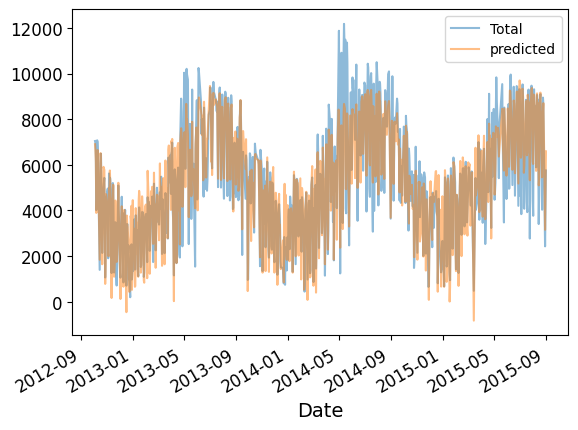

In [ ]:
RMSE_training_LR = np.sqrt(mean_squared_error(y, model.predict(X)))
print("RMSE from Training=" + str(round(RMSE_training_LR, 4)))

daily['predicted'] = model.predict(X)
daily.sort_index(inplace=True)  # sort the DataFrame by its date index
daily[['Total', 'predicted']].plot(alpha=0.5)


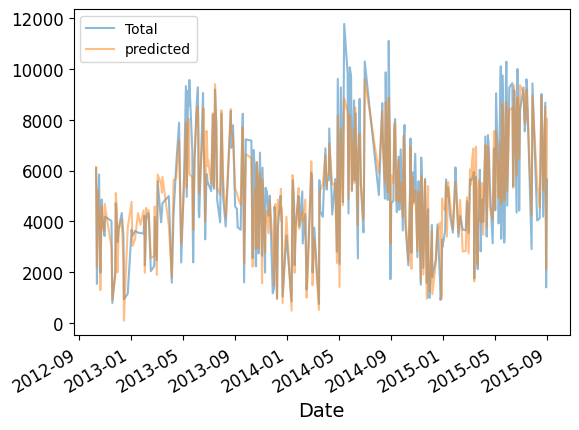

RMSE from Test=898.2645


In [ ]:
# Ensure the index is in datetime format (if not already)
test.index = pd.to_datetime(test.index)

# Predict and add the predictions to the DataFrame
test['predicted'] = model.predict(X_test)

# Sort the DataFrame by the date index
test.sort_index(inplace=True)

# Plot the actual and predicted values by date
test[['Total', 'predicted']].plot(alpha=0.5)
plt.show()

# Compute the RMSE for the test set
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("RMSE from Test=" + str(round(RMSE_test_LR, 4)))



It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).
Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.

Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).

These are all potentially interesting effects, and you now have the tools to begin exploring them.

### 2.2- Ridge Linear Regression Exercise

Now is your time to implement a Ridge Linear Regression using skelearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). You could also see the last code chunck of the [Regularized_Linear_Regression.ipynb notebook](https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Regularized_Linear_Regression.ipynb)

You can perform some additional feature engineering. BUT ONLY LOOK AT THE PERFORMANCE OF YOUR MODEL ON THE TEST SET ONCE YOUR MODEL IS READY (i.e., do not change your model after looking at the test set performance since this will introduce bias)

The name of the pipepline should be `ridge_regression_pipeline`, also be advise to keep the "degree of polynomial"   small (~<4) since this dataset already have a lot of features and incresing it even more, will increase the compute time + the bootstrap resamplings  will take even longer. (for example degree 2 takes ~20s but with 4 it jumps to ~254s)

In [ ]:

### START CODE HERE ### (≈ 9 lines of code)








### END CODE HERE ###

#Calculate the model's parameters error
np.random.seed(1)
err = np.std([ridge_regression_pipeline.fit(*resample(X, y)).named_steps.Ridge_lin_reg.coef_
              for i in range(1000)], 0)

params = pd.Series(ridge_regression_pipeline.named_steps.Ridge_lin_reg.coef_,
                   index=ridge_regression_pipeline.named_steps.poly_features.get_feature_names_out(X.columns))  # Use get_feature_names_out
pd.DataFrame({'effect': params.round(0), 'error': err.round(0)})


,effect,error
Mon,302.0,81.0
Tue,-91.0,72.0
Wed,-7.0,70.0
Thu,120.0,76.0
Fri,26.0,73.0
...,...,...
dry day Temp (C),-20.0,158.0
dry day annual,-34.0,93.0
Temp (C)^2,-702.0,197.0
Temp (C) annual,-294.0,156.0


RMSE Ridge LR from Training=894.3093


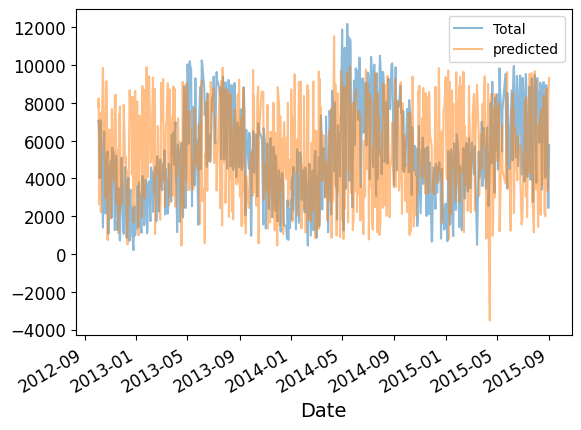

In [ ]:
#Calculate model RMSE
RMSE_training_Ridge=np.sqrt(mean_squared_error(y, ridge_regression_pipeline.predict(X)))
print("RMSE Ridge LR from Training=" + str(round(RMSE_training_Ridge,4)))

#Plot predicted values
daily['predicted'] = ridge_regression_pipeline.predict(X)
daily[['Total', 'predicted']].plot(alpha=0.5);


RMSE Ridge LR from Test=994.0199


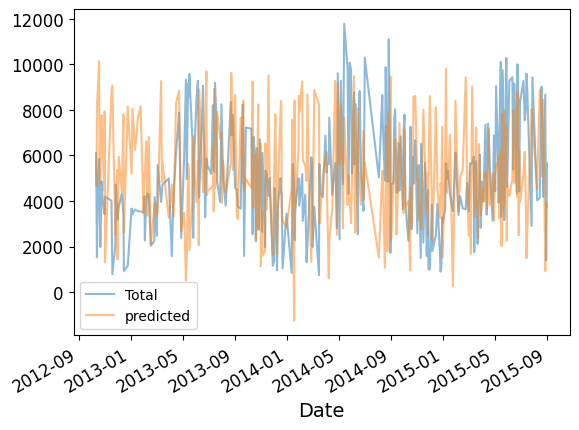

In [ ]:
RMSE_test_Ridge=np.sqrt(mean_squared_error(y_test, ridge_regression_pipeline.predict(X_test)))
print("RMSE Ridge LR from Test=" + str(round(RMSE_test_Ridge,4)))

test['predicted'] = ridge_regression_pipeline.predict(X_test)
test[['Total', 'predicted']].plot(alpha=0.5);

### 2.3- Lasso Linear Regression Exercise

Now is your time to implement a Lasso Linear Regression using skelearn's [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). You could also see the last code chunck of the [Regularized_Linear_Regression.ipynb notebook](https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Regularized_Linear_Regression.ipynb)

You can perform some additional feature engineering. BUT ONLY LOOK AT THE PERFORMANCE OF YOUR MODEL ON THE TEST SET ONCE YOU MODEL IS READY (i.e., do not change your model after looking at the test set performance since this will introduce bias).

The name of the pipepline should be `lasso_regression_pipeline`
(due to the issues of converganve, Lasso might take longer than Ridge LR)

In [ ]:
### START CODE HERE ### (≈ 9 lines of code)







### END CODE HERE ###

np.random.seed(1)
err = np.std([lasso_regression_pipeline.fit(*resample(X, y)).named_steps.Lasso_lin_reg.coef_
              for i in range(1000)], 0)

params = pd.Series(lasso_regression_pipeline.named_steps.Lasso_lin_reg.coef_,
                   index=lasso_regression_pipeline.named_steps.poly_features.get_feature_names_out(X.columns)) #Change get_feature_names to get_feature_names_out
table=pd.DataFrame({'effect': params.round(0),'error': err.round(0)})
table


,effect,error
Mon,324.0,160.0
Tue,0.0,97.0
Wed,230.0,106.0
Thu,317.0,102.0
Fri,-144.0,119.0
...,...,...
dry day Temp (C),-64.0,156.0
dry day annual,-16.0,90.0
Temp (C)^2,-846.0,188.0
Temp (C) annual,154.0,147.0


Lets get the features with zero weights/coefficients

In [ ]:
table[ table['effect']==0 ]

,effect,error
Tue,0.0,97.0
Mon Tue,0.0,0.0
Mon Wed,0.0,0.0
Mon Thu,0.0,0.0
Mon Fri,0.0,0.0
Mon Sat,0.0,0.0
Mon Sun,0.0,0.0
Mon PRCP,0.0,45.0
Mon dry day,0.0,53.0
Mon Temp (C),-0.0,88.0


RMSE from Training=813.7035


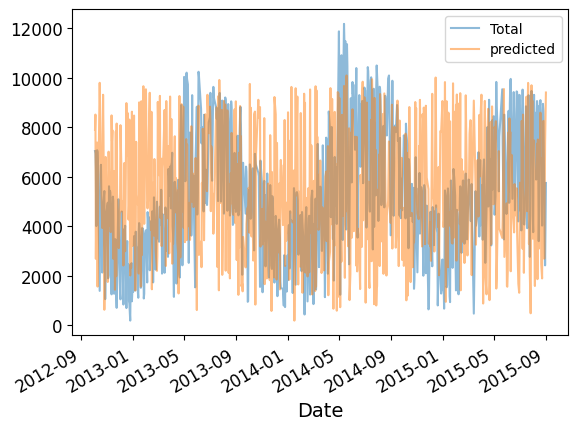

In [ ]:
RMSE_training_Lasso=np.sqrt(mean_squared_error(y, lasso_regression_pipeline.predict(X)))
print("RMSE from Training=" + str(round(RMSE_training_Lasso,4)))

daily['predicted'] = lasso_regression_pipeline.predict(X)
daily[['Total', 'predicted']].plot(alpha=0.5);


RMSE from Test=891.8757


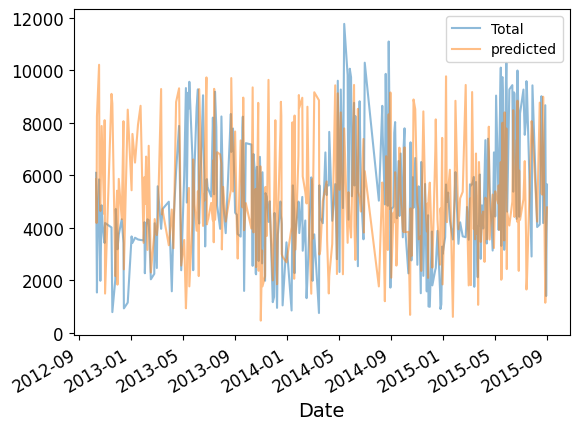

In [ ]:

RMSE_test_Lasso=np.sqrt(mean_squared_error(y_test, lasso_regression_pipeline.predict(X_test)))
print("RMSE from Test=" + str(round(RMSE_test_Lasso,4)))

test['predicted'] = lasso_regression_pipeline.predict(X_test)
test[['Total', 'predicted']].plot(alpha=0.5);


As you have experienced, we can do a lot of different things to make our model perform better (change the regularization term, add or remove features,….). But how can we make this process more efficient?


Well, we could use a process to identify the hyperparameter that will create the model that best fit the data, similar to the training process that helps us identify the model’ parameter that best fit the data (we will talk more about hyperparameter optimization/tuning later on the class)


###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**




In [ ]:
# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
# ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_MRLR.py
import numpy as np
from GRADING_MRLR import GRADING

try:
    X_norm_sklearn
except:
    X_norm_sklearn=None
try:
    X_norm
except:
    X_norm=None
try:
    theta_best
except:
    theta_best=None
try:
    theta_cost
except:
    theta_cost=None
try:
    MAE_val
except:
    MAE_val=None
try:
    MAE_skl
except:
    MAE_skl=None
try:
    MSE_skl
except:
    MSE_skl=None
try:
    RMSE_val
except:
    RMSE_val=None
try:
    RMSE_skl
except:
    RMSE_skl=None
try:
    R_square_val
except:
    R_square_val=None

try:
    R_square_skl
except:
    R_square_skl=None

try:
    ridge_regression_pipeline
except:
    ridge_regression_pipeline=None


try:
    RMSE_training_Ridge
except:
    RMSE_training_Ridge=None


try:
    RMSE_test_Ridge
except:
    RMSE_test_Ridge=None

try:
    RMSE_training_Lasso
except:
    RMSE_training_Lasso=None


try:
    RMSE_test_Lasso
except:
    RMSE_tRMSE_test_Lassoest_Ridge=None


try:
    lasso_regression_pipeline
except:
    lasso_regression_pipeline=None




GRADING(X_norm_sklearn, X_norm,theta_best, theta_cost,MAE_val, MAE_skl,MSE_val, MSE_skl,RMSE_val,RMSE_skl,R_square_val,R_square_skl,RMSE_training_LR,RMSE_test_LR,
        ridge_regression_pipeline,RMSE_training_Ridge, RMSE_test_Ridge,RMSE_training_Lasso, RMSE_test_Lasso,lasso_regression_pipeline)

--2025-02-24 20:29:30--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_MRLR.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2363 (2.3K) [text/plain]
Saving to: ‘GRADING_MRLR.py.1’

GRADING_MRLR.py.1   100%[===================>]   2.31K  --.-KB/s    in 0s      

2025-02-24 20:29:30 (45.9 MB/s) - ‘GRADING_MRLR.py.1’ saved [2363/2363]

feature_Normalize_implementation : True
normalEqn_Reg : True
MAE : True
MSE : True
RMSE : True
R_square : True
Ridge_LR_working : True
Lasso_LR_working : True
 
RMSE from Training=929.76125
RMSE Ridge LR from Training=894.3093
RMSE Lasso LR from Training=813.7035
 
RMSE from Test=898.2645
RMSE Ridge LR from Test=994.0199
RMSE Lasso LR from Test=891.8757
 
NORMALIZED???
 
{'poly_features': Polyn